# Creating Customer Segments

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Tell iPython to include plots inline in the notebook
%matplotlib inline

data = pd.read_csv("wholesale-customers.csv")

print "Dataset has {} rows, {} columns\n".format(*data.shape)
print data.head()  # print the first 5 rows

print data.var()

Dataset has 440 rows, 6 columns

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64


# Feature Transformation

When graphed on a principal component biplot, most points will fall in the middle (0, 0). Some will lie mostly along the first principal component axis (x-axis), and some will lie mostly along the second (y-axis). I think that some feature vectors will fall close together, such as "fresh" and "milk". A lot of points will lie along those vectors. By looking at the data, I see a few things. Each row is the wholesaler's customer, and the numbers represent the amount bought (unsure if the numbers represent number of items or dollar amount purchased).

As for ICA, I think the components will be statistically independent. The numbers and format of ICA's output will be similar to PCA, but the vector will find a space where the features are maximally independent. This means ICA is able to distinguish the difference between the two features, just as the cocktail party problem can distinguish different voices. One possible ICA component could be an anti-correlation between detergents paper and delicatessen products.

# PCA

In [3]:
from sklearn.decomposition import PCA

# train PCA on data and get the first two/three principal components
pca = PCA(n_components=min(*data.shape)).fit(data)
components_df = pd.DataFrame(pca.components_, columns=data.columns)
first_pc = pca.components_[0]
second_pc = pca.components_[1]

print components_df
print "\n"
# observe the explained variance ratio to use on a scree plot
print "Explained Variance Ratios:\n{}".format(pca.explained_variance_ratio_)

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
1 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
2 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
3 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
4  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
5 -0.015763  0.033492  0.410939 -0.013289         -0.871284     -0.265417


Explained Variance Ratios:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


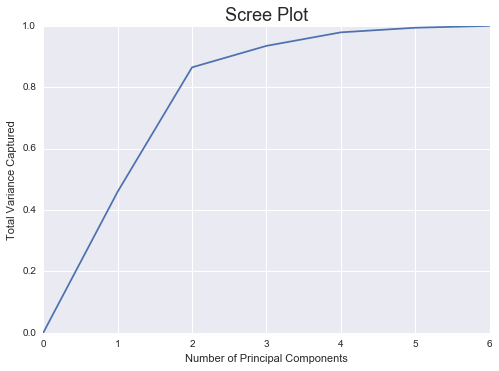

In [4]:
# Use the scree plot to determine what min number of PCs to use
import seaborn as sns

plt.title("Scree Plot", size=18)
adjusted_ratio = np.concatenate([[0], pca.explained_variance_ratio_])
plt.plot(np.cumsum(adjusted_ratio))
plt.xlabel("Number of Principal Components")
plt.ylabel("Total Variance Captured")

The "elbow" of the scree plot is at x = 2. We wil use 2 as the number of principal components. The variance drops off quickly, with over 90% of its variance being captured by the first three principal components. Using a scree plot to analyze the variance captured, we see see an "elbow" at two principal components. One principal component only captures 46% of the variance. Three principal components doesn't give significantly more information than two, and the additional information can possibly be noise. Therefore, I would use two principal components.

In [5]:
from sklearn.preprocessing import StandardScaler

# scale the data, so the data of each column is uniform
scaled_data = StandardScaler().fit_transform(data)
# reduce the data matrix down to 2 dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
# reduce the scaled data down to 2 dimensions
reduced_scaled_data = PCA(n_components=2).fit_transform(scaled_data)

print "reduced_data:"
print reduced_data[:10]  # print upto 10 elements
print "\nreduced_scaled_data:"
print reduced_scaled_data[:10]

reduced_data:
[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]

reduced_scaled_data:
[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


(440, 2)


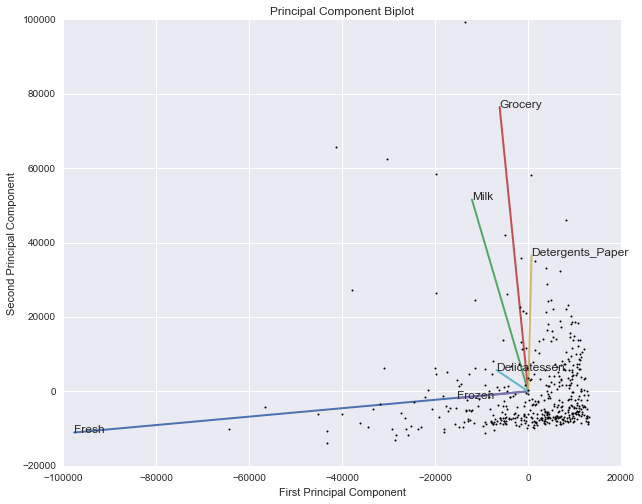

In [6]:
# adjusting the size of the vectors for the graph
first_pc = [x*100000 for x in first_pc]
second_pc = [x*100000 for x in second_pc]

plt.figure(figsize=(10,8))
# plotting PC vectors
for i, j in enumerate(data.columns):
    plt.plot([0, first_pc[i]], [0, second_pc[i]], lw=2, label=j)
    plt.annotate(data.columns[i], (first_pc[i], second_pc[i]), size=12)
# plotting data points
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=4)
plt.title("Principal Component Biplot")
plt.xlim(-100000, 20000)
plt.ylim(-20000, 100000)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

print reduced_data.shape

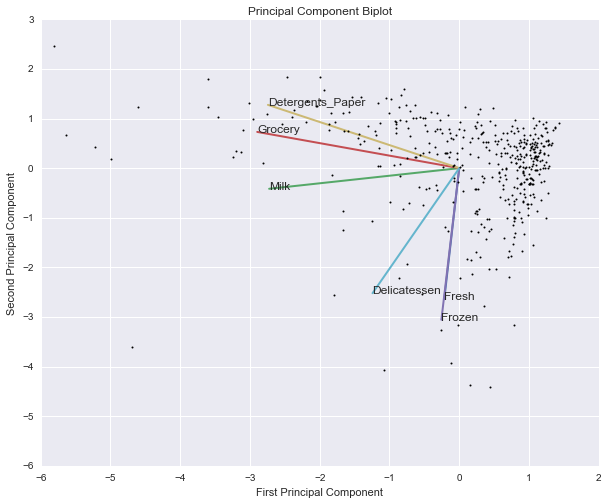

In [7]:
# Scaled data
# Use this to find correlation among variables
scaled_pca = PCA(n_components=2).fit(scaled_data)
scaled_first_pc = [x*5 for x in scaled_pca.components_[0]]
scaled_second_pc = [x*5 for x in scaled_pca.components_[1]]

plt.figure(figsize=(10,8))
for i, j in enumerate(data.columns):
    plt.plot([0, scaled_first_pc[i]], [0, scaled_second_pc[i]], lw=2, label=j)
    plt.annotate(data.columns[i], (scaled_first_pc[i], scaled_second_pc[i]), size=12)
plt.plot(reduced_scaled_data[:, 0], reduced_scaled_data[:, 1], 'k.', markersize=4)
plt.title("Principal Component Biplot")
plt.xlim(-6, 2)
plt.ylim(-6, 3)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

With the first principal component, we see that it is highly correlated with the annual spending of fresh products. So we say that this is primarily a measure of fresh products. Fresh products also has the highest variance of all the variables.

The second principal component is a measure of groceries and milk, but mainly groceries. This means that buyers who purchase more groceries also purchase more milk. Also, these two are slightly processed, with milk being pasteurized, so their shelf lives can last longer than a month after being processed.

Using this information, we can attempt to "identify an underlying structure" of these features. If one of the products increases, then the others also increase. If we are experimenting with a new delivery system, we can group these correlated products together, so these products can generally be delivered in the same trucks. Perhaps, milk and groceries can grouped together because they need to be shipped less frequently. Fresh products must be shipped more frequently, since they perish sooner.

###ICA

Axes(0.125,0.125;0.775x0.775)


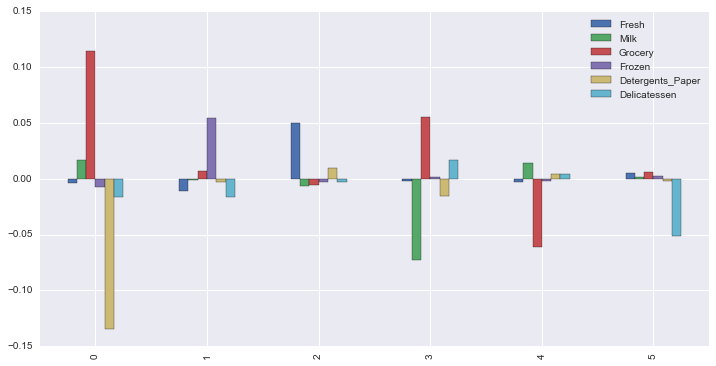

In [8]:
# Fit an ICA model to the data
# Adjust the data to have center at the origin first
from sklearn.decomposition import FastICA

# set random_state to an arbitrary number
ica = FastICA(n_components=min(*scaled_data.shape), random_state=12, whiten=True)
ica.fit(scaled_data)

ica_components_df = pd.DataFrame(ica.components_, columns=data.columns)

print ica_components_df.plot(kind='bar', figsize=(12, 6))

The first independent component shows an anti-correlation between grocery foods and detergents paper. This could represent a group of buyers who represent mini grocery stores and who don't have much space for detergents paper.

The second independent component primarily measures frozen products, so this could be an ice cream shop or gas station store. 

The third component could be represented by a store that sells fresh products, like a farmer's market.

The fourth component shows an anti-correlation between milk and grocery foods. This can be a group of vegan restaurants or a cheese shop.

This information can be helpful for the distributor in providing a information about the products that are independent of each other. Perhaps, it doesn't matter whether or not they are shipped together, and it isn't important to group them together.

# Clustering

K-Means clustering is very fast, and each data point falls into a definite cluster. K-Means is hard clustering, meaning each cluster has a definite set of claimed data points. Gaussian Mixture Model is soft clustering. This means that each point is assigned, based on the the probability that it actually falls into the cluster. GMM is used when the clusters and their boundaries are not apparent. GMM gives more structural information: it maps out the Gaussian cluster circles, so on a two-dimensional graph it provides how the cluster circles are oriented in three-dimensional space.

GMM is the better suited clustering algorithm here. Since the data points are plotted in six dimensions, we need GMM to provide more information of the clusters.

In [9]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
# The visualizer below assumes your clustering object is named 'clusters'

# initialize a k means model with 6 clusters
kmeans_clusters = KMeans(n_clusters=6, random_state=12).fit(reduced_scaled_data)

# initialize a gaussian mixture model, with 4, 5, and 6 clusters
# fit the model with the 2-dimensional data
four_clusters = GMM(n_components=4, random_state=12).fit(reduced_scaled_data)
five_clusters = GMM(n_components=5, random_state=12).fit(reduced_scaled_data)
six_clusters = GMM(n_components=6, random_state=12).fit(reduced_scaled_data)

print kmeans_clusters
print four_clusters
print five_clusters
print six_clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=12, tol=0.0001,
    verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=12,
  thresh=None, tol=0.001, verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=12,
  thresh=None, tol=0.001, verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=12,
  thresh=None, tol=0.001, verbose=0)


In [10]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_scaled_data[:, 0].min() - 1, reduced_scaled_data[:, 0].max() + 1
y_min, y_max = reduced_scaled_data[:, 1].min() - 1, reduced_scaled_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_four = four_clusters.predict(np.c_[xx.ravel(), yy.ravel()])
Z_five = five_clusters.predict(np.c_[xx.ravel(), yy.ravel()])
Z_six = six_clusters.predict(np.c_[xx.ravel(), yy.ravel()])
Z_kmeans = kmeans_clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [11]:
# Find the centroids for KMeans or the cluster means for GMM 
four_centroids = four_clusters.means_
five_centroids = five_clusters.means_
six_centroids = six_clusters.means_

kmeans_centroids = kmeans_clusters.cluster_centers_

print "GMM 4 Means:\n", four_centroids
print "GMM 5 Means:\n", five_centroids
print "GMM 6 Means:\n", six_centroids
print "KMeans:\n", kmeans_centroids

GMM 4 Means:
[[-0.67573459  0.61548063]
 [-5.91810194  1.01983569]
 [ 0.82654993 -0.09038611]
 [-1.18123764 -2.8950175 ]]
GMM 5 Means:
[[ 0.12977036 -0.80293783]
 [ 0.96223753  0.09910825]
 [-0.81717902  0.78618511]
 [-5.98369792  1.02504959]
 [-3.94858233 -6.66774494]]
GMM 6 Means:
[[-0.11208337  0.48090173]
 [ 0.97011703  0.08310503]
 [-7.27189306  1.05020413]
 [-1.70192003  0.99888295]
 [-4.20477216 -7.02981766]
 [ 0.12769022 -1.19050981]]
KMeans:
[[ -0.55245937   0.58520782]
 [  0.89631335   0.16760105]
 [ -8.73369878   1.3469361 ]
 [ -2.91872278   0.81930466]
 [ -4.51308525 -10.04070335]
 [  0.26549736  -1.6537929 ]]


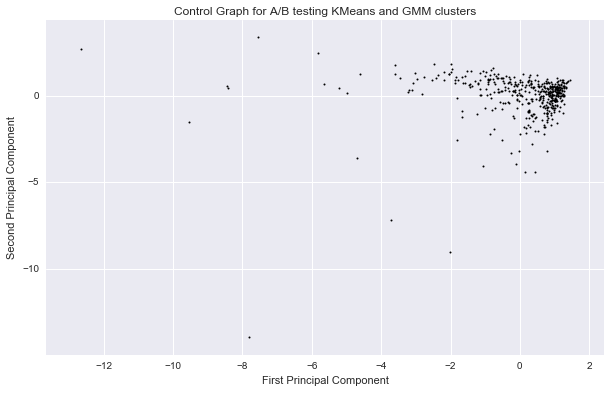

In [12]:
# Control graph for A/B testing KMeans and GMM
# The KMeans and BMM boundaries might skew my judgment
plt.figure(figsize=(10, 6))
plt.plot(reduced_scaled_data[:, 0], reduced_scaled_data[:, 1], 'k.', markersize=4)
plt.title("Control Graph for A/B testing KMeans and GMM clusters")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

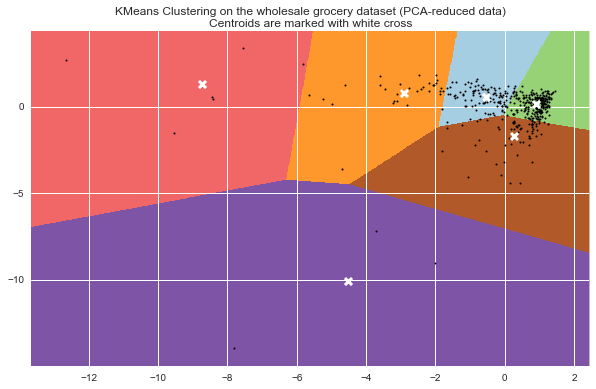

In [16]:
# Plotting KMeans
Z_kmeans = Z_kmeans.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.clf()
plt.imshow(Z_kmeans, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_scaled_data[:, 0], reduced_scaled_data[:, 1], 'k.', markersize=4)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='w', zorder=10)
plt.title('KMeans Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.show()

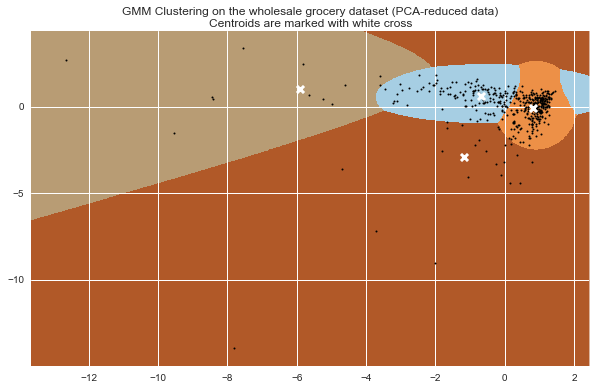

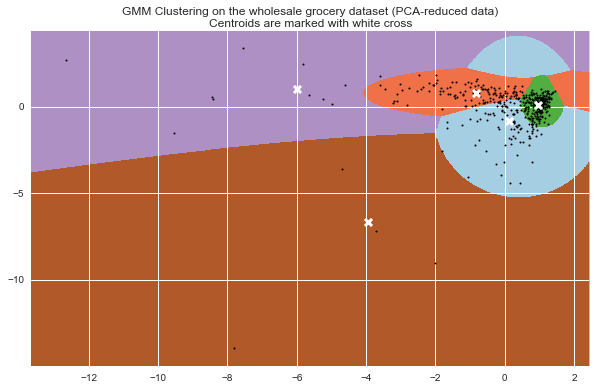

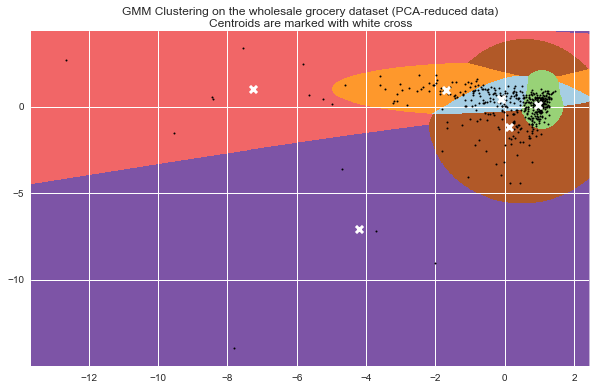

In [17]:
# Plotting GMM with K cluster centers
clusters = [[Z_four, four_centroids], [Z_five, five_centroids], [Z_six, six_centroids]]

for clust, centroid in clusters:
    clust = clust.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.clf()
    plt.imshow(clust, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    plt.plot(reduced_scaled_data[:, 0], reduced_scaled_data[:, 1], 'k.', markersize=4)
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='x', s=50, linewidths=3,
                color='w', zorder=10)
    plt.title('GMM Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks()
    plt.yticks()
    plt.show()

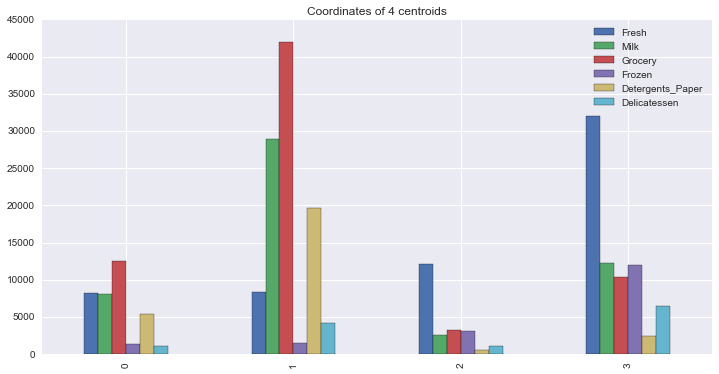

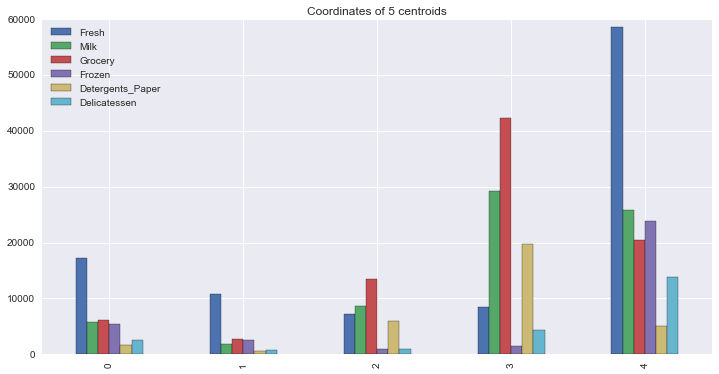

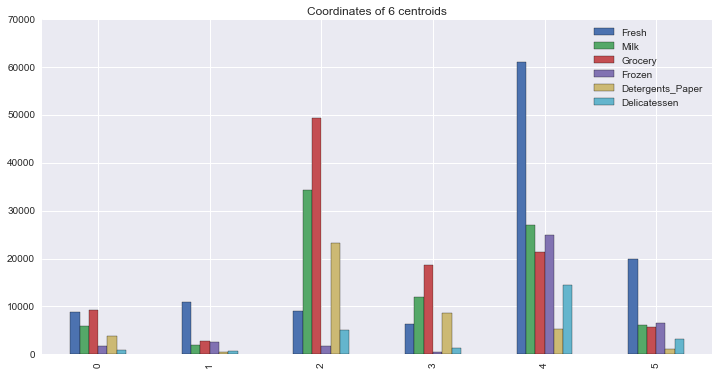

In [20]:
# Sample and interpret the elements of each cluster
centroids = [four_centroids, five_centroids, six_centroids]

for centroid in centroids:
    scaled_original_centroids = scaled_pca.inverse_transform(centroid)
    unscaled_original_centroids = StandardScaler().fit(data).inverse_transform(scaled_original_centroids)

    centroid_coords = pd.DataFrame(unscaled_original_centroids, columns=data.columns)

    centroid_coords.plot(title='Coordinates of {} centroids'.format(centroid.shape[0]),kind='bar', figsize=(12,6))

After deciding to use the Gaussian Mixture Model with six clusters, let's analyze the graph:

The first cluster of customers buys a small amount of fresh products, milk and grocery products. This could be a convenience store.

The second cluster buys fresh products and very little of the rest of the products. This could be a small butcher shop or seafood store.

The third cluster buys, in order of abundance, a lot of groceries, milk, detergents paper, some fresh products, and deli. This could be a mid-sized grocery store.

The fourth cluster buys groceries, milk, detergents paper, and some fresh products. This could be one of those corner grocery stores that presents fruits and vegetables outside in woven baskets.

The fifth cluster buys a large amount of fresh products, followed by a lot of milk, groceries, frozen foods, and deli. This could be a large grocery store, like a Safeway or a Wal-Mart Supercenter.

The sixth cluster buys more fresh products, along with some milk, groceries, and frozen products. This could be a health food store, such as a Whole Foods or Trader Joe's.

The central objects (x's) aren't data points, but they are the mean point of each cluster of data points. These customers can be categorized as one who buy a certain combination and price of the six wholesale products.

Graphing the Gaussian Mixture Model gave me the most insight into the data. Intuitively, or visually, GMM fits well with the data, and the clusters become apparent after graphing them; whereas, KMeans divides the data into clusters that don't look apparent. GMM allowed the data to be separated based on the likelihood that each data point belongs to its corresponding cluster. 

There are a few different A/B tests for delivery methods I have come up with, after analyzing the data. Here is one of them.

1 I asked: "Is there another type of delivery method, that has been overlooked, that we can use to satisfy all clusters of customers?"

2 I researched: the data, using PCA and clustering methods.

3 I hypothesized: Understanding the amount of perishable items vs nonperishable items of each type/cluster of buyer will satisfy each customer.

4 I would run the test for a month, in order to capture the full inventory turnover of each store.

5 Test the hypothesis: two types of shipments: 1 have larger and less frequent shipments of nonperishable items and 2 smaller and more frequent shipments of perishable items for the smaller stores: convenience stores, seafood/butcher shops, corner grocery stores, and health food stores. The stores that purchase a larger volume of products can be shipped their inventory more frequently, since they can easily adapt to a change in delivery method.

6 I would analyze to see if dividing the delivery shipment for each store cluster is both feasible for them and cheaper for the wholesaler.

We can use the clustering technique to predict the type of new incoming features for buyers, using a supervised learning model. We could use GMM to cluster types of customers and create new features, based on what those customers buy. The target column will consist of each of the six cluster groups. We can test the accuracy of the prediction, using an F1 score.